# Finite Difference Method to Solve a Second Order Boundary Value Problem

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
def forward_elimination(A,b):
    n =  np.shape(A)[0]
    for k in range(0,n-1):
        for i in range(k+1,n):
            m = A[i,k]/A[k,k]
            for j in range(k,n):
                #print(i, j, A[i,j], A[k,j])
                A[i,j] = A[i,j] - m*A[k,j]
            b[i] = b[i] - m*b[k]
    #print(A,b)
    return A, b                

In [74]:
def back_substitution(A,b):
    n = np.shape(A)[0]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in range(n-2,-1,-1):
        #print(i)
        _sum = 0
        for j in range(n-1,i,-1):
            #print("j:", j)
            _sum += A[i,j] * x[j]
        x[i] = (b[i] - _sum) / A[i,i]
    
    #print(x)
    return x

### Finite difference scheme for the equation $u''(x) = e^x$ with boundary conditions $u'(0) = u(1) = 0$.



In [75]:
def set_up_matrix(n):
    h = 1/n
    # finite difference matrix for the problem
    A = np.zeros((n,n))
    A[0,0] = -2
    A[0,1] = 2
    for i in range(1,n-1):
        A[i,i] = -2
        A[i,i-1] = 1
        A[i,i+1] = 1
    A[n-1,n-2] = 1
    A[n-1,n-1] = -2
    A = A/(h**2)

    # discretized right-hand side
    b = np.zeros(n)
    for i in range(n):
        b[i] = np.exp(i*h)

    return A, b

# solve the system with n grid points
def solve_equation(n):
    
    A, b = set_up_matrix(n)
    # perform Gaussian elimination on A and b
    ge_A, ge_b = forward_elimination(A,b)
    # compute solution using back substitution
    U = back_substitution(ge_A, ge_b)
    return U

def solve_equation2(n):
    A, b = set_up_matrix(n)
    b[0] = 0
    # perform Gaussian elimination on A and b
    ge_A, ge_b = forward_elimination(A,b)
    # compute solution using back substitution
    U = back_substitution(ge_A, ge_b)
    return U

def discretize_analytic_sol(n):
    h = 1/n
    u = np.zeros(n)
    for i in range(n):
        u[i] = np.exp(i*h) - i*h + 1 - np.exp(1)
    return u

In [85]:
# solve the system with 20 grid points
n = 20
h = 1/20

U1 = solve_equation(n)
print("Computed solution for (i): U =", U1)


U2 = solve_equation2(n)
print("Computed solution for (ii): U =", U2)


# analytic solution u to the equation
u = np.zeros(n)
for i in range(n):
    u[i] = np.exp(i*h) - i*h + 1 - np.exp(1)
print("Analytic solution: u = ", u)

Computed solution for (i): U = [-0.71771557 -0.71646557 -0.7125874  -0.70594629 -0.6964006  -0.6838014
 -0.66799214 -0.64880823 -0.62607666 -0.59961552 -0.5692336  -0.53472988
 -0.49589302 -0.45250087 -0.40431987 -0.35110448 -0.29259659 -0.22852486
 -0.158604   -0.08253414]
Computed solution for (ii): U = [-0.69271557 -0.69271557 -0.6900874  -0.68469629 -0.6764006  -0.6650514
 -0.65049214 -0.63255823 -0.61107666 -0.58586552 -0.5567336  -0.52347988
 -0.48589302 -0.44375087 -0.39681987 -0.34485448 -0.28759659 -0.22477486
 -0.156104   -0.08128414]
Analytic solution: u =  [-0.71828183 -0.71701073 -0.71311091 -0.70644759 -0.69687907 -0.68425641
 -0.66842302 -0.64921428 -0.62645713 -0.59996964 -0.56956056 -0.53502881
 -0.49616303 -0.452741   -0.40452912 -0.35128181 -0.2927409  -0.22863498
 -0.15867872 -0.08257217]


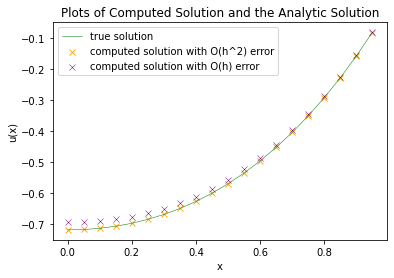

In [88]:
# compare computed solution to analytic solution

inputs = [i*h for i in range(20)]

plt. title("Plots of Computed Solution and the Analytic Solution")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.plot(inputs, u, color = "green", label = "true solution", linewidth = 0.5)
#plt.plot(inputs, U, color = "orange", label = "computed solution", linewidth = 0.2)
plt.scatter(inputs, U1, color = "orange",label = "computed solution with O(h^2) error", marker = "x",linewidths=0.9)
plt.scatter(inputs, U2, color = "purple",label = "computed solution with O(h) error", marker = "x",linewidths=0.5)
plt.legend()
plt.savefig("solutions_plot.png")
plt.show()

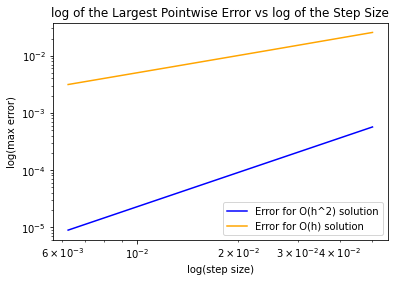

In [87]:
# compare grid sizes

# array of grid sizes we want to compare.
grid_sizes = np.array([20, 40, 80, 160])
# array of step sizes
step_size_array = 1/grid_sizes
# computed solutions
U1_array = []
U2_array = []
# max pointwise error array per grid size
E1 = np.zeros(4)
E2 = np.zeros(4)

# compute the solutions using the finite difference method and the error at the
# worst approximated grid point for the different grid sizes
for i in range(4):
    # add computed solution to our array of solutions
    U1_array.append(solve_equation(grid_sizes[i]))
    U2_array.append(solve_equation2(grid_sizes[i]))
    # true solution
    v = discretize_analytic_sol(grid_sizes[i])
    # total error vector
    error1 = U1_array[i] - v
    error2 = U2_array[i] - v
    # error at the worst grid point
    E1[i] = np.max(error1)
    E2[i] = np.max(error2)
    
# plot log(max error) vs log(step size)
plt.title("log of the Largest Pointwise Error vs log of the Step Size")
plt.ylabel("log(max error)")
plt.xlabel("log(step size)")
plt.plot(step_size_array, E1, color = "blue", label = "Error for O(h^2) solution")
plt.plot(step_size_array, E2, color = "orange", label = "Error for O(h) solution")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.savefig("error_plot.png")